In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (13, 7)
plt.style.use('fivethirtyeight')

import seaborn as sns
#sns.set_style('whitegrid')
#sns.set(rc={'figure.figsize' : (13, 7)})

# colwidth to see everything in each columns and max_columns to see 

#pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_columns', 70)

import missingno as msn

In [2]:
df = pd.read_csv(r'C:\Users\JASIM\Documents\Coding\DataSet\stack-overflow-developer-survey-2021\Dwayama survey\survey_results_public.csv')

In [3]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

# Data Overview 

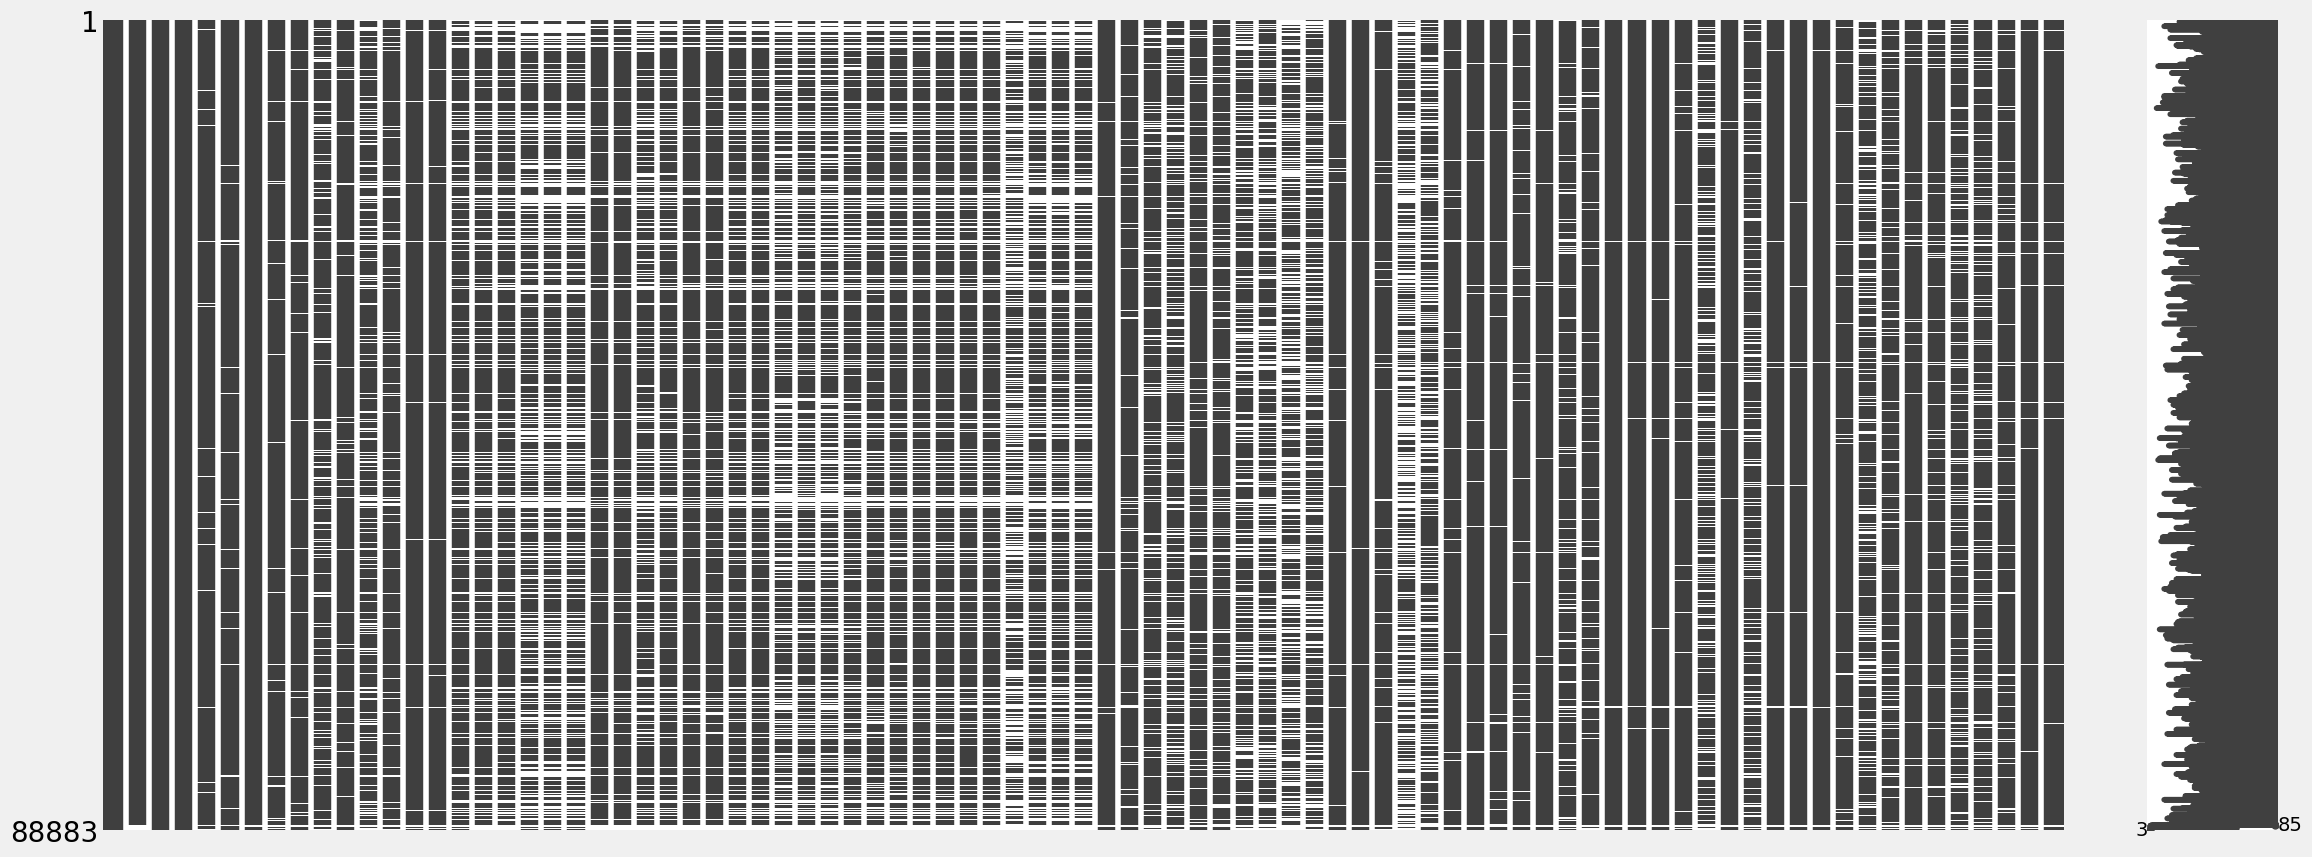

In [4]:
#sns.heatmap(df.isnull())

msn.matrix(df)
plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              88883 non-null  int64  
 1   MainBranch              88331 non-null  object 
 2   Hobbyist                88883 non-null  object 
 3   OpenSourcer             88883 non-null  object 
 4   OpenSource              86842 non-null  object 
 5   Employment              87181 non-null  object 
 6   Country                 88751 non-null  object 
 7   Student                 87014 non-null  object 
 8   EdLevel                 86390 non-null  object 
 9   UndergradMajor          75614 non-null  object 
 10  EduOther                84260 non-null  object 
 11  OrgSize                 71791 non-null  object 
 12  DevType                 81335 non-null  object 
 13  YearsCode               87938 non-null  object 
 14  Age1stCode              87634 non-null

In [6]:
df.shape

(88883, 85)

In [7]:
#pd.set_option('display.max_colwidth', 400)
df_des = pd.read_csv(r'C:\Users\JASIM\Documents\Coding\DataSet\stack-overflow-developer-survey-2021\Dwayama survey\survey_results_schema.csv')
df_des.head(40)
#df_des.tail(40)

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...
5,Employment,Which of the following best describes your cur...
6,Country,In which country do you currently reside?
7,Student,"Are you currently enrolled in a formal, degree..."
8,EdLevel,Which of the following best describes the high...
9,UndergradMajor,What was your main or most important field of ...


* there is around 88883 rows and 85 columns
* Some columns is object and some float

# Data Cleaning and Preparing

#

### Frist removing the colums we don't need

In [8]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [9]:
df.drop(columns = ['Respondent', 'CompFreq', 'Extraversion' , 'ScreenName'
                   , 'SOTimeSaved', 'SOVisit1st', 'SOHowMuchTime'
                   , 'SOJobs', 'EntTeams','SOComm', 'WelcomeChange'
                   , 'SurveyLength', 'SurveyEase','Sexuality','Trans'
                   , 'Containers', 'OffOn', 'OrgSize', 'MgrMoney'
                   , 'LastHireDate', 'CurrencySymbol', 'CurrencyDesc'
                   , 'ConvertedComp'] 
                   ,   inplace=True)

### Removing duplicates 

In [10]:
#df.duplicated().sum()
df.drop_duplicates(inplace=True)

* There was round about 105 duplicated values so i remove it 

### Replacing the values

In [11]:
#To change it to bolean
#df['Hobbyist']=df['Hobbyist'].replace({'Yes': True, 'No': False})

# To int
df[['YearsCode', 'YearsCodePro']] = df[['YearsCode', 'YearsCodePro']].\
                      replace({'Less than 1 year': 1, 'More than 50 years': 51})

df['Age1stCode'] = df['Age1stCode'].replace({'Younger than 5 years': 5, 'Older than 85': 85})
df['Age'] = df['Age'].replace({'NaN', ''})


* i want to change dtypes of some columns 
* to int, float and bolean

In [12]:
df.CompTotal.unique()

array([    nan,  23000.,  61000., ..., 723800.,   4752.,  42768.])

### Changing the dtypes to float

In [13]:
#df['YearsCode'] = df['YearsCode'].fillna(0)
df[['YearsCode', 'YearsCodePro', 'CompTotal', 'Age1stCode']] = df[['YearsCode', 
                                                                   'YearsCodePro', 
                                                                   'CompTotal', 
                                                                   'Age1stCode']].astype(float)

* We change the dtypes of some columns to float  
* and also replace some values becasue we can't chnage the dtypes if its in a columns

In [14]:
df['YearsCode'].isnull().sum()

840

In [15]:
df.YearsCode.median()

9.0

### First find median for some columns than Changing dtypes to int

In [16]:
col_median = [#'Age', 
              'YearsCode', 'YearsCodePro', 'Age1stCode', 'CompTotal' ]

median = df[col_median].median()

df[col_median] = df[col_median].fillna(median)

df[col_median] = df[col_median].astype(int)

C:\Users\JASIM\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)


* First of all i fill null values of a columns with median
* I use median because there is a lot out liar in these columns 
* Another reason of filling this columns to chnage it int

So over all 
   * i have drop some columns that were not important and than remove some duplicated values 
   * Than i replace some values according to columns becasue i was wanna change the dtypes of these columns to float  
   * than i fill these columns with median values i did not use mean because there was some outliars that can effect our data 
   * After this i change columns to int and one to bolean

# Insight from data and Vasulization

In [17]:
df.describe()

,YearsCode,Age1stCode,YearsCodePro,CompTotal,WorkWeekHrs,CodeRevHrs,Age
count,88778.000000,88778.000000,88778.000000,8.877800e+04,64503.000000,49790.000000,79210.000000
mean,11.652324,15.409685,7.850458,3.670836e+05,42.127197,5.084308,30.336699
std,9.094163,5.149331,7.004044,2.873035e+07,37.287610,5.513931,9.178390
min,1.000000,5.000000,1.000000,-2.147484e+09,1.000000,0.000000,1.000000
25%,5.000000,12.000000,3.000000,4.500000e+04,40.000000,2.000000,24.000000
50%,9.000000,15.000000,6.000000,6.200000e+04,40.000000,4.000000,29.000000
75%,15.000000,18.000000,10.000000,8.000000e+04,44.750000,6.000000,35.000000
max,51.000000,85.000000,51.000000,1.800000e+09,4850.000000,99.000000,99.000000


In [18]:
df.Age.isnull().sum()

9568

In [19]:
df.YearsCode.isnull().sum()

0

In [20]:
df.YearsCode.median()

9.0

In [21]:
df.Age.max()

99.0

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88778 entries, 0 to 88882
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MainBranch              88331 non-null  object 
 1   Hobbyist                88778 non-null  object 
 2   OpenSourcer             88778 non-null  object 
 3   OpenSource              86763 non-null  object 
 4   Employment              87100 non-null  object 
 5   Country                 88751 non-null  object 
 6   Student                 87014 non-null  object 
 7   EdLevel                 86390 non-null  object 
 8   UndergradMajor          75614 non-null  object 
 9   EduOther                84260 non-null  object 
 10  DevType                 81335 non-null  object 
 11  YearsCode               88778 non-null  int32  
 12  Age1stCode              88778 non-null  int32  
 13  YearsCodePro            88778 non-null  int32  
 14  CareerSat               72847 non-null

## What is the average years of code?

In [23]:
df.YearsCode.describe()

count    88778.000000
mean        11.652324
std          9.094163
min          1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         51.000000
Name: YearsCode, dtype: float64

In [24]:
df.YearsCode.mean()

11.65232377390795

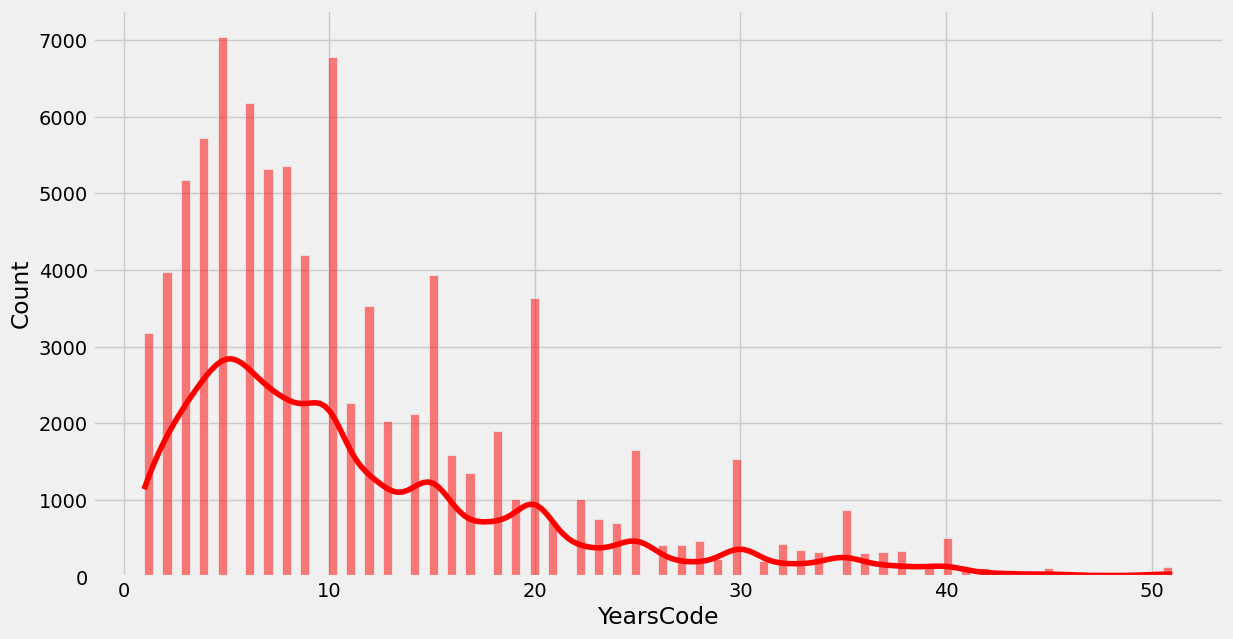

In [25]:
sns.histplot(df.YearsCode, color='r', kde=True)

plt.show()

* The minimum yearcode is 1 year
* The maximum ia baout 50 years
* The average codeyear is 11 years 

## How many people code as a hobby and How many code as profession?

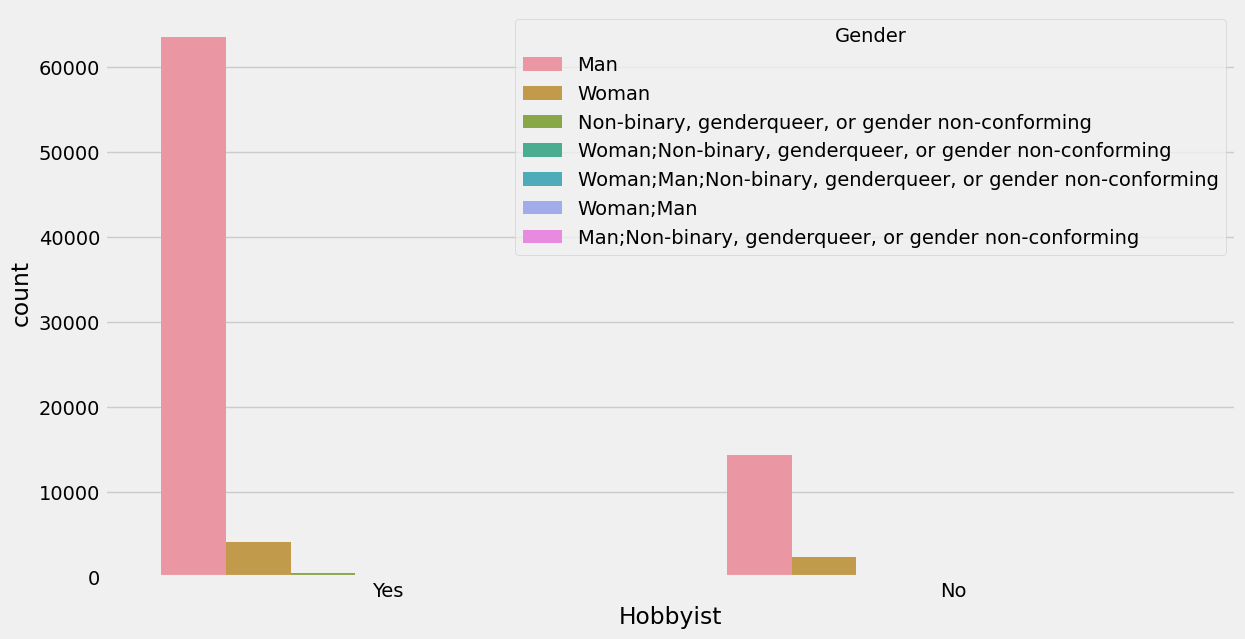

In [26]:
sns.countplot(x = 'Hobbyist', data=df, 
              hue='Gender', 
              #log=True, 
             )
plt.show()

# How many individuals are employed in full-time jobs versus those who are not employed?

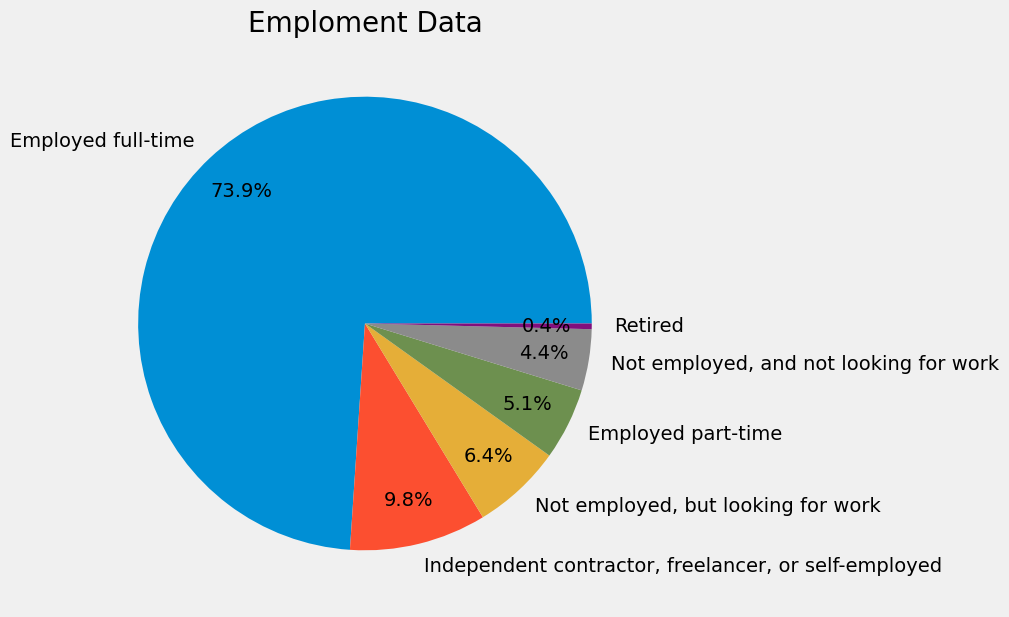

In [27]:
emploment = df.Employment.value_counts()
emploment_types = ['Employed full-time',                                    
'Independent contractor, freelancer, or self-employed',     
'Not employed, but looking for work',                       
'Employed part-time',                                       
'Not employed, and not looking for work',                   
'Retired']

fig, ax = plt.subplots()
ax.pie(emploment,
                 labels = emploment_types,
                 autopct = '%1.1f%%',
                 pctdistance = .8)

plt.title('Emploment Data', size= 20)
plt.show()

## What are the most common Devtype reported by the developers in the dataset?

In [35]:
#df.DevType.value_counts().head(10)

top_10_devtypes = df['DevType'].value_counts().head(10)

print("The top 10 most common job titles among respondents are as follows:\n")

for i, (devtype, count) in enumerate(top_10_devtypes.items(), start=1):
    print(f"{i}. {devtype}: {count}")


The top 10 most common job titles among respondents are as follows:

1. Developer, full-stack: 8433
2. Developer, back-end: 4913
3. Developer, back-end;Developer, front-end;Developer, full-stack: 2399
4. Developer, front-end: 2212
5. Developer, mobile: 2172
6. Developer, back-end;Developer, full-stack: 2047
7. Student: 1515
8. Developer, front-end;Developer, full-stack: 1023
9. Developer, desktop or enterprise applications: 1005
10. Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack: 885


## What is the distribution of educational levels and work experience among developers in the survey

In [38]:
# Calculate the distribution of educational levels
edu_counts = df['EdLevel'].value_counts() / len(df)*100

# Calculate the distribution of work experience
exp_counts = df['YearsCode'].value_counts(normalize=True) *100

# Print the results
print("Distribution of educational levels among developers:")
print()
print(edu_counts)
print("\nDistribution of work experience among developers:")
print(exp_counts.head(10))

Distribution of educational levels among developers:

Bachelor’s degree (BA, BS, B.Eng., etc.)                                              44.080741
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           22.042623
Some college/university study without earning a degree                                11.829507
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     9.734394
Associate degree                                                                       3.309378
Other doctoral degree (Ph.D, Ed.D., etc.)                                              2.739417
Primary/elementary school                                                              1.601748
Professional degree (JD, MD, etc.)                                                     1.349433
I never completed any formal education                                                 0.622902
Name: EdLevel, dtype: float64

Distribution of work experience among developers:
5

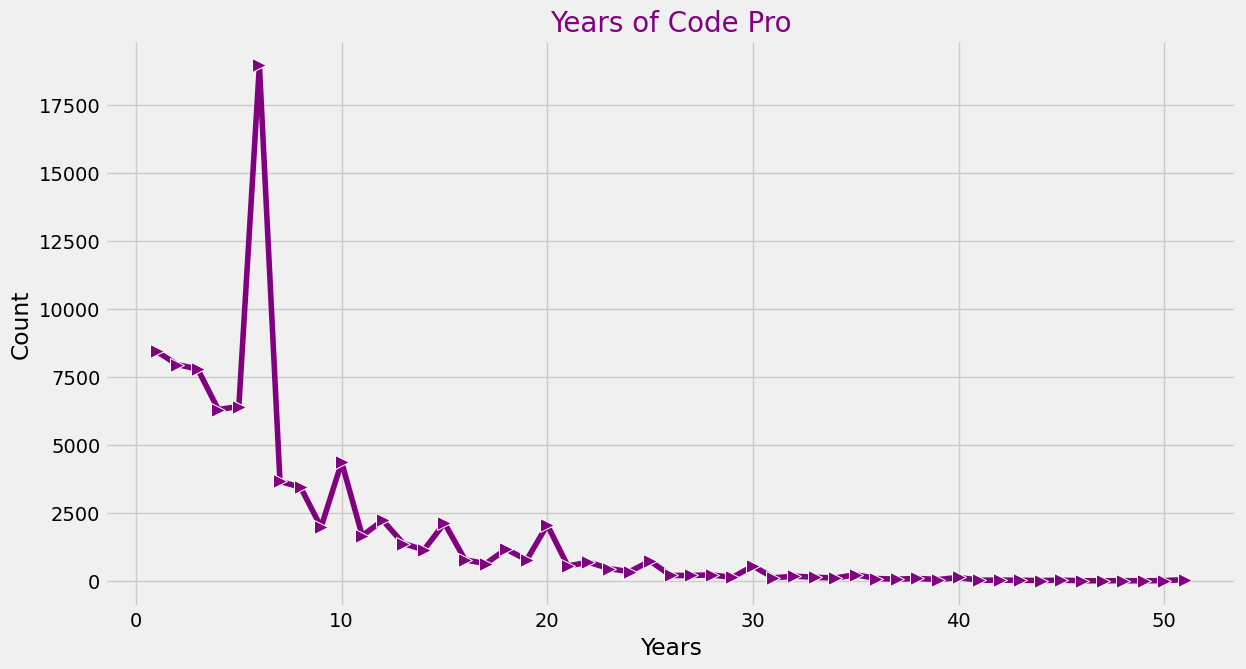

In [30]:
experince_asPro_developer = df.YearsCodePro.value_counts()

sns.lineplot (x= experince_asPro_developer.index, 
              y= experince_asPro_developer,
              linewidth= 4, color= 'purple',
              marker= '>', markersize= 10
             )

plt.title('Years of Code Pro', color='purple', size=20)
plt.ylabel('Count')
plt.xlabel('Years')
plt.show()

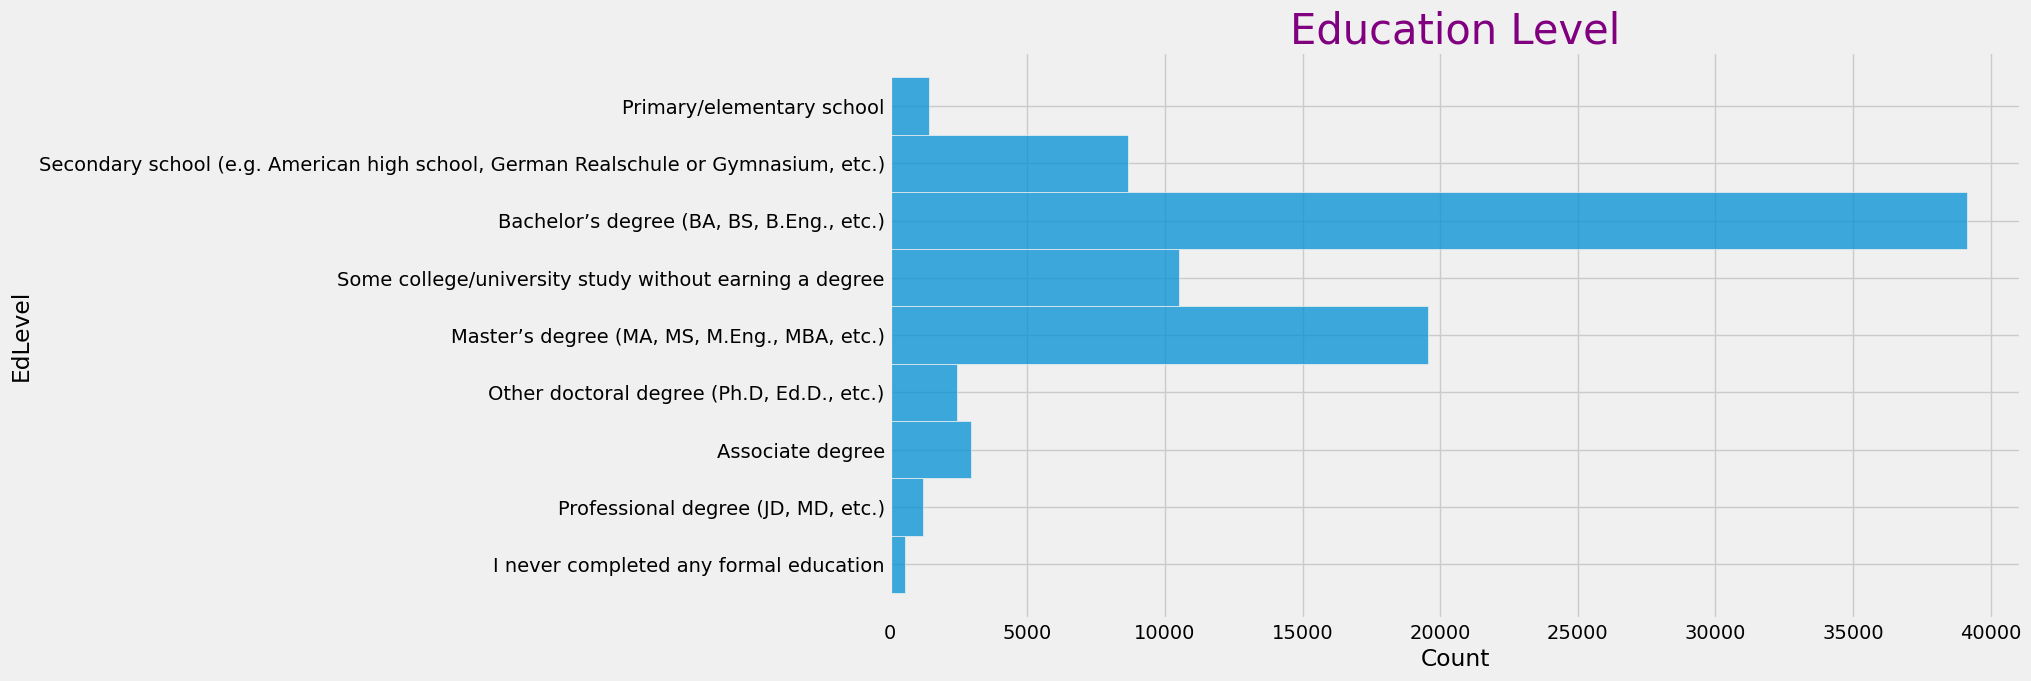

In [31]:
sns.histplot(y=df['EdLevel'])

#plt.xlabel('EdLevel', size=11)
plt.title('Education Level', color='purple', 
          size=30, 
         )
plt.show()

* The majority of respondents (44.08%) had a Bachelor's degree (BA, BS, B.Eng., etc.)
* Those with a Master's degree (22.04%). About 12% of respondents had some college or university study without earning a degree, while 9.73% had only completed secondary school.
* The most common response was that developers had been coding for 5 years (7.94%), followed closely by those with 10 years of experience (7.63%).
* Developers with 6 years of experience made up 6.96% of respondents

## What is the number of survey respondents from each country in a servey?

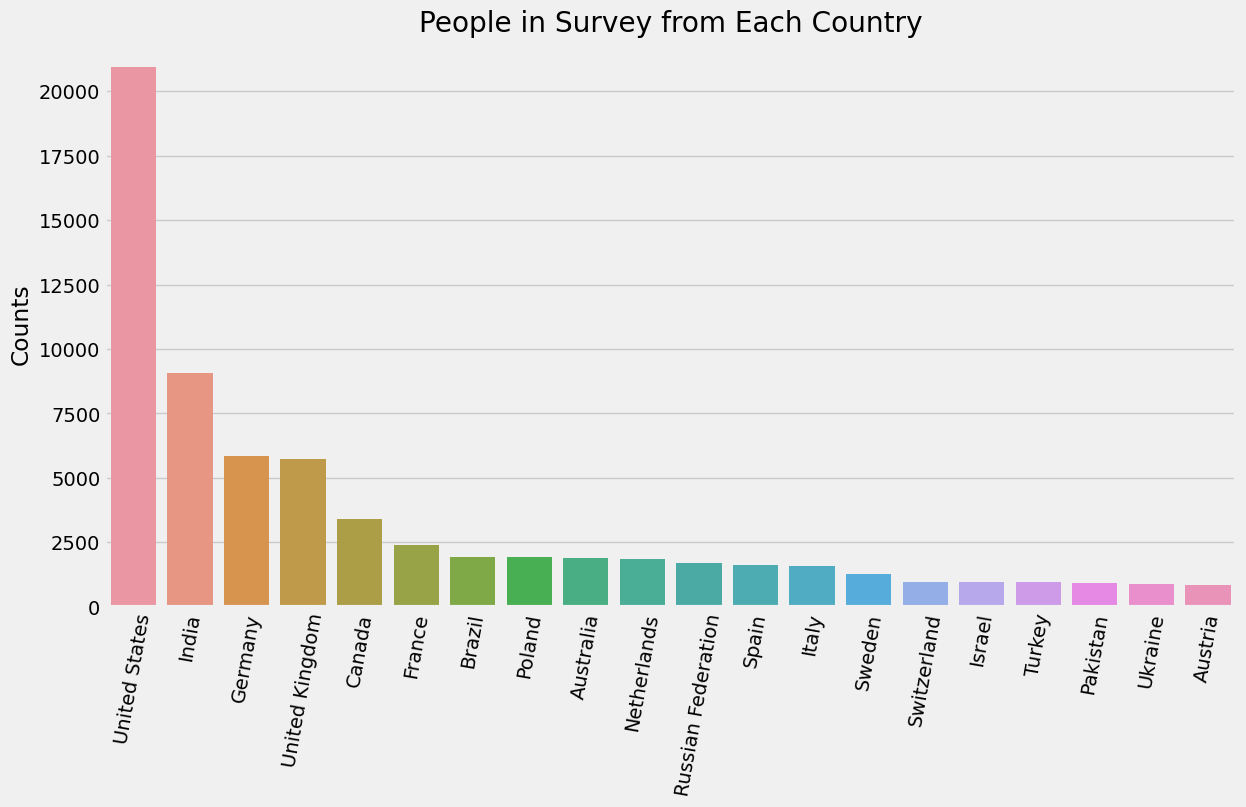

In [32]:
PeopleSurvey_countryWise = df.Country.value_counts()[:20]

sns.barplot(x = PeopleSurvey_countryWise.index, 
            y = PeopleSurvey_countryWise.values)

plt.xticks(rotation=80)
plt.title('People in Survey from Each Country')
plt.ylabel('Counts')
plt.show()

* The United States had the highest number of developers in the survey, with approximately 22,000 developers, followed by India with around 8,000 developers. 
* The dataset contains information on the number of developers from many other countries as well.

## What is the distribution of programming languages and tools used by the developers?

In [39]:
programinglanguage = df.LanguageWorkedWith.value_counts()
programinglanguage  / len(df) * 100

HTML/CSS;JavaScript;PHP;SQL                                                        1.670459
C#;HTML/CSS;JavaScript;SQL                                                         1.592737
HTML/CSS;JavaScript                                                                1.404627
C#;HTML/CSS;JavaScript;SQL;TypeScript                                              1.115141
Java                                                                               1.052062
                                                                                     ...   
Bash/Shell/PowerShell;Clojure;Go;JavaScript;Python;R;Rust;WebAssembly;Other(s):    0.001126
C;C#;Go;HTML/CSS;Java;JavaScript;PHP;Python;SQL;TypeScript                         0.001126
C;C++;Java;Objective-C;Python;R;Scala;Swift                                        0.001126
Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;Python;SQL;WebAssembly                0.001126
Assembly;Bash/Shell/PowerShell;C;C#;HTML/CSS;Java;JavaScript;PHP;SQL;Other(s):  

* it seem most of the developer worked with following languages 
* HTML/CSS;JavaScript;PHP;SQL
* it appears that HTML/CSS, JavaScript, PHP, and SQL are being used together for web development. Specifically, PHP is likely being used for server-side scripting

## What are the top 10 most used Environ by full-stack developer?

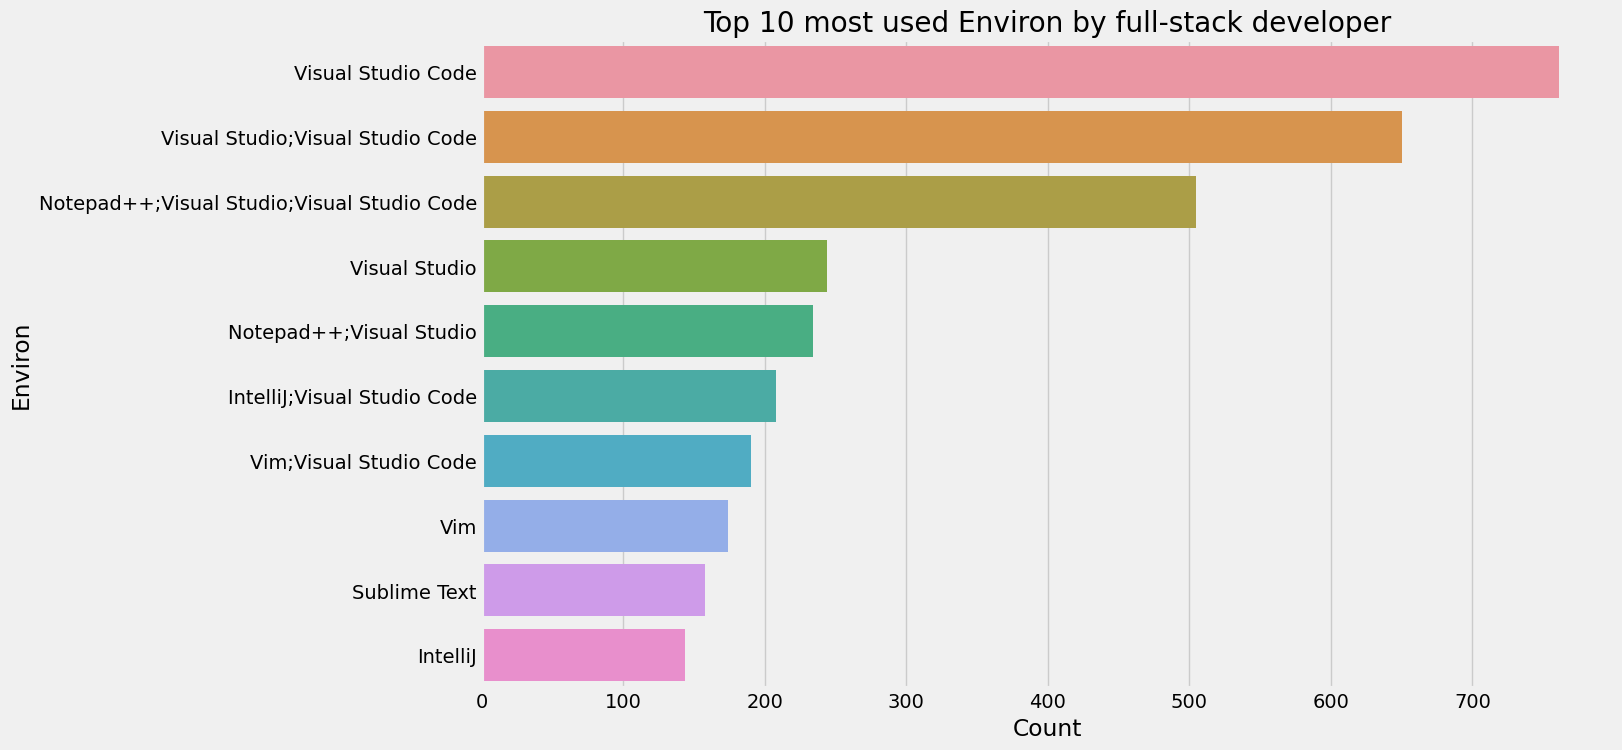

In [41]:
full_stack_dev = df[df['DevType'] == 'Developer, full-stack']
most_used_Environ = full_stack_dev.DevEnviron.value_counts()[:10]

fig= plt.figure(figsize=(13,8))
sns.barplot(x= most_used_Environ.values, 
            y= most_used_Environ.index, #hue='Gender'
           )

plt.title('Top 10 most used Environ by full-stack developer')
plt.ylabel('Environ')
plt.xlabel('Count')
plt.show()

## What are the most popular operating systems used by the developers in the dataset?

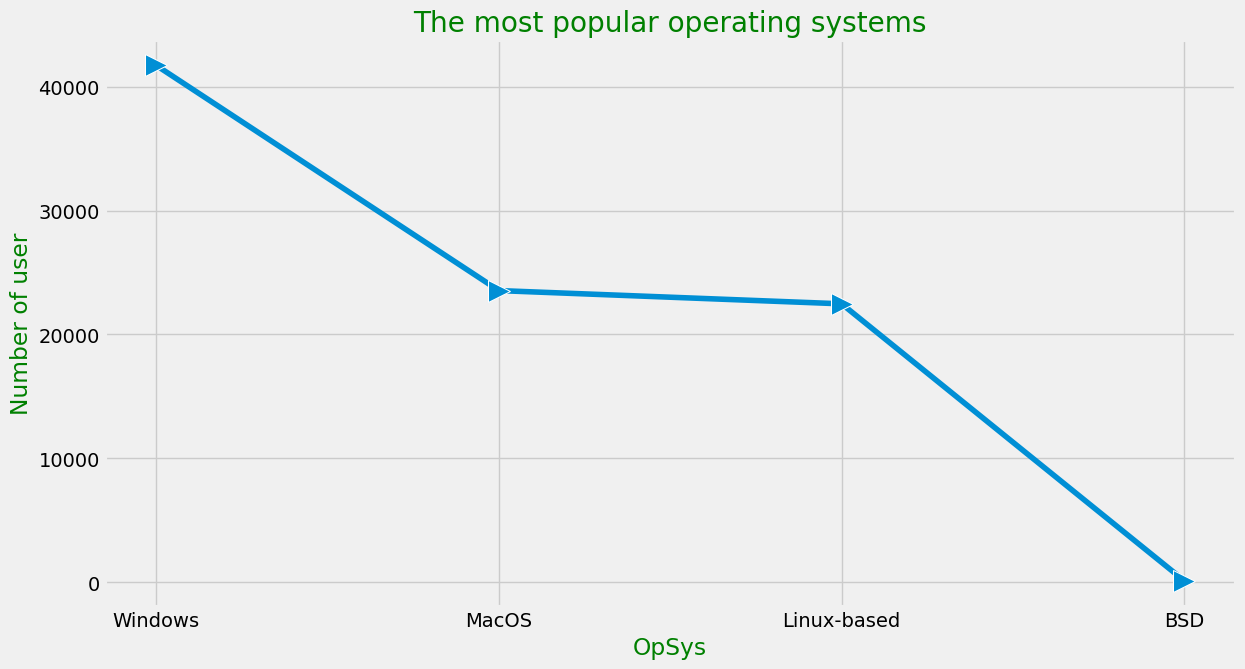

In [42]:
operationgsys =df.OpSys.value_counts()

sns.lineplot(x=operationgsys.index, 
             y=operationgsys.values,
            marker = '>', markersize=16)

plt.title('The most popular operating systems', color='g')
plt.ylabel('Number of user', color='g')
plt.xlabel('OpSys', color='g')
plt.show()

* the number of developers who used each operating system, with Windows being the most popular among the respondents (41,714)
* The MacOS (23,541), Linux-based operating systems (22,472), and BSD (124). 
* It suggests that a majority of developers in the survey preferred using either Windows or MacOS for their work

In [ ]:
sns.displot(df.Age)

# PRactice


# What is the distribution of programming languages and tools used by the developers in the dataset?

In [ ]:
df.head()

In [ ]:
languages = df.LanguageWorkedWith.value_counts()

In [ ]:
languages = df.LanguageWorkedWith.value_counts()
language_percentages = languages  / len(df) * 100

language_percentages

In [49]:
df.head(3)

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrWant,JobSeek,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CompTotal,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,BlockchainOrg,BlockchainIs,BetterLife,ITperson,SocialMedia,SOVisitFreq,SOVisitTo,SOFindAnswer,SOAccount,SOPartFreq,SONewContent,Age,Gender,Ethnicity,Dependents
0,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,4,10,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,NaN,NaN,Yes,"Fortunately, someone else has that title",Twitter,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,No,NaN,Tech articles written by other developers;Indu...,14.0,Man,NaN,No
1,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,"Developer, desktop or enterprise applications;...",9,17,6,NaN,NaN,NaN,NaN,I am actively looking for a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",62000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,NaN,Useful across many domains and could change ma...,Yes,Yes,Instagram,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Yes,A few times per month or weekly,Tech articles written by other developers;Indu...,19.0,Man,NaN,No
2,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...","Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,"I’m not actively looking, but I am open to new...",Interview with people in peer roles,No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,23000,40.0,There's no schedule or spec; I work on what se...,Distracting work environment;Inadequate access...,Less than once per month / Never,Home,Average,No,NaN,"No, but I think we should",Not sure,I have little or no influence,HTML/CSS,Elixir;HTML/CSS,PostgreSQL,PostgreSQL,NaN,NaN,NaN,Other(s):,NaN,NaN,Vim;Visual Studio Code,Linux-based,NaN,NaN,Yes,Yes,Reddit,A few times per week,Find answers to specific questions;Learn how t...,6-10 times per week,Yes,Less than once per month or monthly,Tech meetups or events in your area;Courses on...,28.0,Man,NaN,Yes


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88778 entries, 0 to 88882
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MainBranch              88331 non-null  object 
 1   Hobbyist                88778 non-null  object 
 2   OpenSourcer             88778 non-null  object 
 3   OpenSource              86763 non-null  object 
 4   Employment              87100 non-null  object 
 5   Country                 88751 non-null  object 
 6   Student                 87014 non-null  object 
 7   EdLevel                 86390 non-null  object 
 8   UndergradMajor          75614 non-null  object 
 9   EduOther                84260 non-null  object 
 10  DevType                 81335 non-null  object 
 11  YearsCode               88778 non-null  int32  
 12  Age1stCode              88778 non-null  int32  
 13  YearsCodePro            88778 non-null  int32  
 14  CareerSat               72847 non-null

In [66]:
Pythondev = df[(df['Employment'] == 'Employed full-time') & 
   (df['LanguageWorkedWith']== 'Python')]
salary = Pythondev.CompTotal.sort_values(ascending=False)
salary.mean()

681157.110403397

In [ ]:
df.DevType.value_counts().head(5)

In [ ]:
df.UndergradMajor.value_counts()

In [ ]:
df.EdLevel.value_counts()

In [ ]:
gg = df.OpSys.value_counts()

In [ ]:
sns.lineplot(data=gg, x=gg.index, y= gg.values,
            marker= '>', markersize=16)

In [ ]:
experince_asPro_developer = df.YearsCodePro.value_counts()
YearsCode_developer = df.YearsCode.value_counts()


sns.lineplot (x= experince_asPro_developer.index, 
              y= experince_asPro_developer,
              linewidth= 4, color= 'Purple',
              marker= '<', markersize= 7,
              legend= False
             )

sns.lineplot (x= YearsCode_developer.index, 
              y= YearsCode_developer,
              linewidth= 2, color= 'red',
              marker= '*', markersize= 5,
              linestyle= '--',
              legend= False)

plt.legend(['Years Code as Pro Developer', 'Code Total Number of years'], loc='upper right')

legendcolor = sns.color_palette(['purple', 'red'])
sns.set_palette(legendcolor)
plt.show()

In [ ]:
df.OpSys.value_counts()

In [ ]:
Developer_Ide = df.DevEnviron.value_counts()[:10]#.sort_values(ascending=False)
Developer_Ide

In [ ]:
sns.barplot(x=Developer_Ide.values , y =Developer_Ide.index )

plt.xticks(rotation=90)

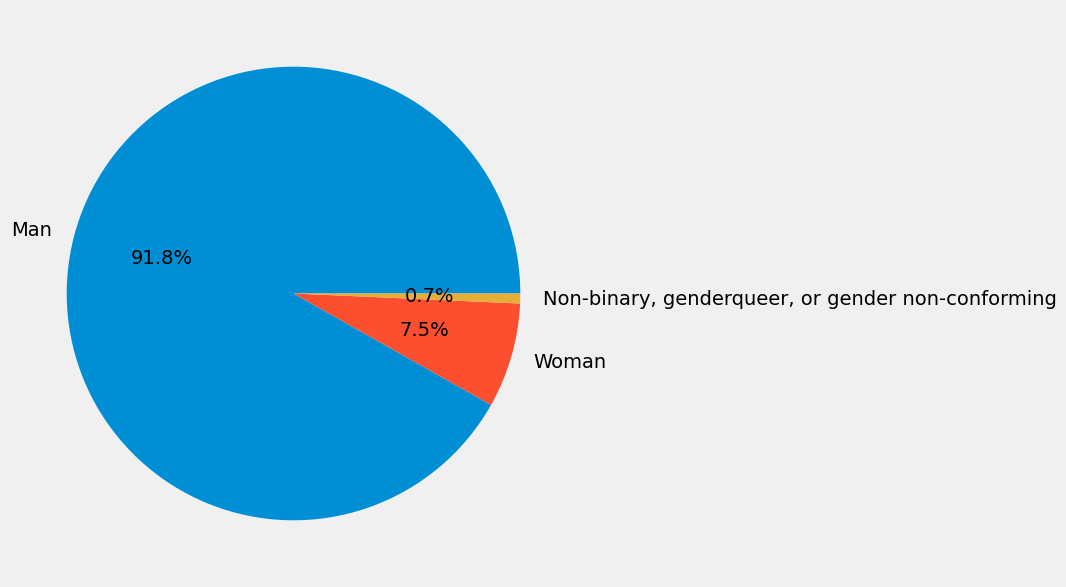

In [67]:
gender = df.Gender.value_counts()[:3]
gender_types = ['Man',                                                            
'Woman',                                                           
'Non-binary, genderqueer, or gender non-conforming',]


fig, ax = plt.subplots()
ax.pie(gender,
        labels= gender_types,
       autopct = '%1.1f%%',
       #pctdistance = 0.5
      )


plt.show()

In [ ]:
sns.histplot(df, x= Developer_Ide, bins=10
            , shrink=.9)